In [2]:
execfile(r'D:\measuring\analysis\scripts\setup_analysis.py')
from analysis.lib.fitting import fit, common
reload(common)
reload(fit)
import inspect
%matplotlib inline

d:\measuring\data
reloaded
d:\measuring\data
reloaded


In [1]:
yellow_repump_data_fp = r'N:\tnw\NS\qt\Diamond\Autobackup\lt2\data_2011-10_2013-10\201304-06\20130417\102317_LaserFrequencyScan_red_scan_go\102317_LaserFrequencyScan_red_scan_go.dat'
green_repump_data_fp = r'N:\tnw\NS\qt\Diamond\Autobackup\lt2\data_2011-10_2013-10\201304-06\20130417\185905_LaserFrequencyScan_red_scan_go\185905_LaserFrequencyScan_red_scan_go.dat'
test1='fdfd'

In [3]:
yellow_repump_data=np.loadtxt(yellow_repump_data_fp, skiprows=20, dtype='float')
green_repump_data=np.loadtxt(green_repump_data_fp, skiprows=20, dtype='float')

In [89]:
d=green_repump_data

In [79]:
np.average(np.abs(np.diff(d[:,1])))

0.0081860570653757916

In [4]:
freq_step=0.005
x1='test'
freq_axis = np.arange(np.min(d[:,1]),np.max(d[:,1]),freq_step)

NameError: name 'd' is not defined

In [1]:
x0s=[]
x0_errs=[]
sigs=[]
ionized=0
for i in np.arange(d[-1,3]):
    f = common.fit_lorentz
    x=d[d[:,3]==i,1]
    y=d[d[:,3]==i,2]
    if np.max(y)<1000:
        ionized+=1
        continue
    args=[1,np.max(y),x[np.argmax(y)],x[np.where(y>np.max(y)/2)[0][-1]]-x[np.where(y>np.max(y)/2)[0][0]]]
    fitres = fit.fit1d(x, y, f, *args, fixed = [],
                   do_print = False, ret = True)
    if fitres['success']:
        x0s.append(fitres['params_dict']['x0'])
        sigs.append(fitres['params_dict']['gamma'])
        x0_errs.append(fitres['error_dict']['x0'])
print float(ionized)/d[-1,3]      

NameError: name 'np' is not defined

In [2]:
plt.errorbar(arange(len(x0s)),x0s,yerr=sigs) 
print np.average(sigs)

NameError: name 'plt' is not defined

In [6]:
plt.errorbar(arange(len(x0s)),x0s,yerr=sigs) 
print np.average(sigs)

NameError: name 'arange' is not defined

In [3]:
np.max([10,20,40])

40

In [35]:
hists=[]
freq_step=0.01
fmin = 62.5
fmax= 63.1
freq_axis = np.arange(fmin,fmax,freq_step)
for d in [green_repump_data,yellow_repump_data]:
    hist_full=np.zeros((d[-1,3],len(freq_axis)-1))
    for i in np.arange(d[-1,3]):
        hist_full[i],b=np.histogram(d[d[:,3]==i,1],bins=freq_axis,weights=d[d[:,3]==i,2])
    hists.append(hist_full)

<matplotlib.colorbar.Colorbar instance at 0x0F048170>

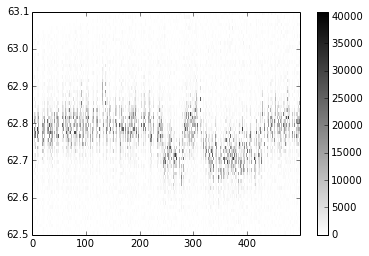

In [98]:
plt.imshow(hists[0].T,cmap=plt.cm.gray_r, extent = (0,d[-1,3],fmin,fmax), aspect='auto', interpolation='none',origin='bottom')
plt.colorbar()

AttributeError: 'AxesSubplot' object has no attribute 'autoscale_None'

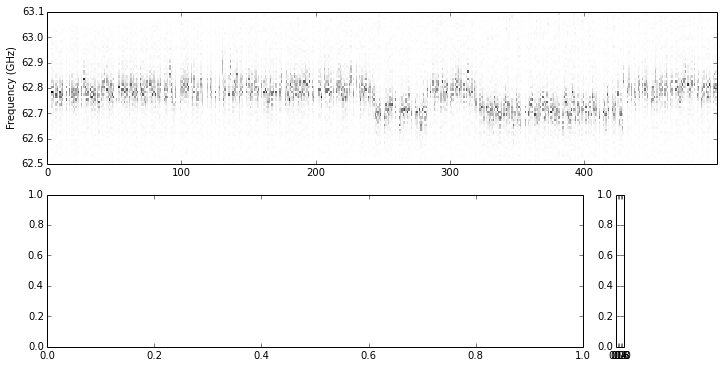

In [96]:
fig,axs=plt.subplots(2,1,figsize=(12.0,6.0))
for i in arange(2):
    axs[i].imshow(hists[i].T,cmap=plt.cm.gray_r, extent = (0,d[-1,3],fmin,fmax), aspect='auto', interpolation='none',origin='bottom')
    axs[i].set_ylabel('Frequency (GHz)')
    plt.colorbar(axs[i])
axs[1].set_xlabel('Scan number')

In [42]:
fig.savefig(r'H:\My Documents\thesis\tex\ch_methods\figures\broadening_bw.jpg',dpi=300)

In [40]:
plt.subplots?

FWHM 0.130049813345 +/- 0.0037007088529
FWHM 0.0713663036555 +/- 0.0011942195353


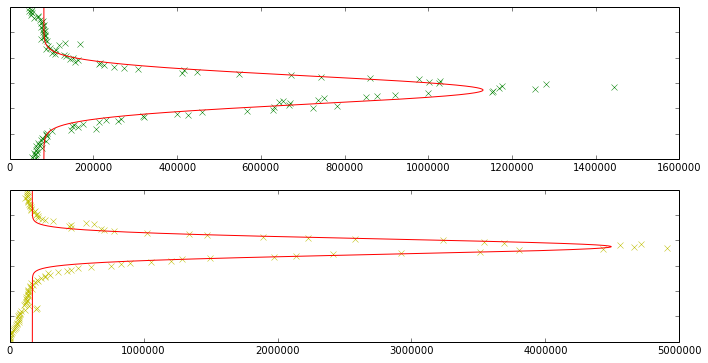

In [101]:
freq_step=0.005
fmin = 62.5
fmax= 63.1
freq_axis = np.arange(fmin,fmax,freq_step)
fig,axs=plt.subplots(2,1,figsize=(12.,6.0))
for i in arange(2):
    clr=['g','y']
    d=[green_repump_data,yellow_repump_data][i]
    h,b=np.histogram(d[:,1],bins=freq_axis,weights=d[:,2])
    x,y=freq_axis[:-1],h
    f = [common.fit_gauss,common.fit_gauss][i]
    args=[1,np.max(y),x[np.argmax(y)],x[np.where(y>np.max(y)/2)[0][-1]]-x[np.where(y>np.max(y)/2)[0][0]]]
    fitres = fit.fit1d(x, y, f, *args, fixed = [],
                   do_print = False, ret = True)
    p1 = fitres['params_dict']
    axs[i].plot(y,x, 'x',color=clr[i])
    #axs[i].set_xticklabels([])
    axs[i].set_yticklabels([])
    plot_pts=10000
    print 'FWHM', fitres['params_dict']['sigma']*2.355, '+/-', fitres['error_dict']['sigma']*2.355
    x_p=np.linspace(min(x),max(x),plot_pts)
    if fitres['success']:
        f_p = fitres['fitfunc'](x_p)
        axs[i].plot(f_p,x_p,color='r')

In [64]:
fig.savefig(r'H:\My Documents\thesis\tex\ch_methods\figures\broadening_fit.pdf')

In [52]:
f = common.fit_lorentz
args=arange(len(inspect.getargspec(f)[0]))
print f(*args)[2]
print inspect.getargspec(f)[0]

a + 2*A/np.pi*gamma/(4*(x-x0)**2+gamma**2)
['g_a', 'g_A', 'g_x0', 'g_gamma']


In [53]:
args=[1,np.max(y),x[np.argmax(y)],x[np.where(y>np.max(y)/2)[0][-1]]-x[np.where(y>np.max(y)/2)[0][0]]]
fitres = fit.fit1d(x, y, f, *args, fixed = [],
                   do_print = True, ret = True)


Converged with chi squared  1.02718694454e+12
degrees of freedom, dof  165
RMS of residuals (i.e. sqrt(chisq/dof))  78901.0482913
Reduced chisq (i.e. variance of residuals)  6225375421.46

fitted parameters at minimum, with 68% C.I.:
 0 a          24308.435269 +/- 7626.806968
 1 A          458489.832559 +/- 4287.569761
 2 x0            62.875083 +/-   0.000221
 3 gamma          0.059501 +/-   0.000704

correlation matrix:
               a         A         x0        gamma     
         a  1.000000
         A -0.605096  1.000000
        x0 -0.000764  0.000424  1.000000
     gamma -0.454902  0.776894  0.000290  1.000000



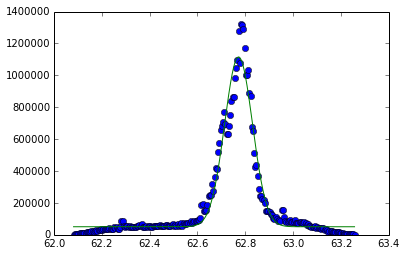

In [46]:
p1 = fitres['params_dict']
plt.plot(x,y, 'o')
plot_pts=10000
x_p=np.linspace(min(x),max(x),plot_pts)
if fitres['success']:
    f_p = fitres['fitfunc'](x_p)
    plt.plot(x_p,f_p)
else:
    f_g = f(*args)[1](x_p)
    plt.plot(x_p,f_g)